<a href="https://colab.research.google.com/github/iamBehzad/A-comprehensive-investigation-on-CIFAR10-CNN-Tensorflow-keras/blob/main/A_comprehensive_investigation_on_CIFAR10_CNN_Tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

#Load and split to test and train data

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x=np.concatenate((x_train, x_test), axis=0)
y=np.concatenate((y_train, y_test), axis=0)

print("x.shape = ",x.shape)
print("y.shape = ",y.shape)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15 )

print("X_train.shape = ",x_train.shape)
print("y_train.shape = ",y_train.shape)
print("X_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

x.shape =  (60000, 32, 32, 3)
y.shape =  (60000, 1)
X_train.shape =  (51000, 32, 32, 3)
y_train.shape =  (51000, 1)
X_test.shape =  (9000, 32, 32, 3)
y_test.shape =  (9000, 1)


#Normalizing

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

#Define a CNN 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(50, 5, activation="relu",
                         padding="same", input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")                                
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        3800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 100)       45100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 200)         180200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 200)        0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#Fit CNN Model with GPU



In [ ]:
start_time = time.time()
history= model.fit(x_train, y_train, epochs=50, validation_split=0.15)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1355/1355 [==============================] - 11s 6ms/step - loss: 1.9172 - accuracy: 0.2811 - val_loss: 1.4660 - val_accuracy: 0.4791
Epoch 2/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.5027 - accuracy: 0.4513 - val_loss: 1.2652 - val_accuracy: 0.5556
Epoch 3/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.3454 - accuracy: 0.5161 - val_loss: 1.1993 - val_accuracy: 0.5684
Epoch 4/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.2297 - accuracy: 0.5656 - val_loss: 1.1346 - val_accuracy: 0.6041
Epoch 5/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.1477 - accuracy: 0.5976 - val_loss: 1.0316 - val_accuracy: 0.6352
Epoch 6/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.0771 - accuracy: 0.6268 - val_loss: 1.0261 - val_accuracy: 0.6382
Epoch 7/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.0081 - accuracy: 0.6528 - val_loss: 0.9832 - val_accuracy

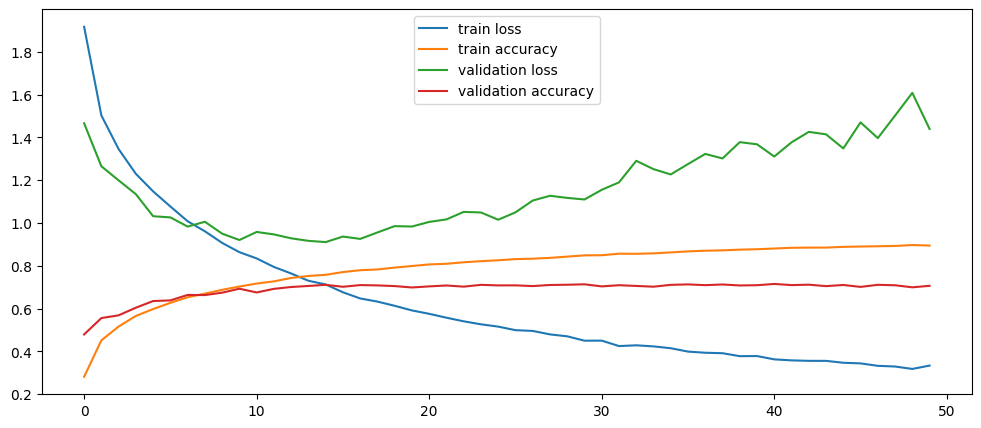

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history['loss'], label='train loss')
ax.plot(history.history['accuracy'], label='train accuracy')
ax.plot(history.history['val_loss'], label='validation loss')
ax.plot(history.history['val_accuracy'], label='validation accuracy')
ax.legend()

In [ ]:
# evaluate the model
print(model.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 1.4073842763900757, 'accuracy': 0.7114444375038147}


#Define a CNN model for test exponential learning rate scheduler

In [ ]:
model_Exp_lr = keras.models.Sequential([
    keras.layers.Conv2D(50, 5, activation="relu",
                         padding="same", input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")                                
])

model_Exp_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        3800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 100)       45100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 200)         180200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 200)        0

In [ ]:
model_Exp_lr.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
def exp_lr_func(eta0, s):
  def exp_lr(epoch):
    return eta0*0.1**(epoch/s)
  return exp_lr

exp_lr_s = exp_lr_func(0.001, 10)
exp_lr_c = keras.callbacks.LearningRateScheduler(exp_lr_s)

#Fit CNN (with Exp lr) Model with GPU


In [ ]:
start_time = time.time()
history_Exp_lr = model_Exp_lr.fit(x_train, y_train, epochs=50, validation_split=0.15, callbacks=[exp_lr_c])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.7595 - accuracy: 0.3505 - val_loss: 1.5161 - val_accuracy: 0.4513 - lr: 0.0010
Epoch 2/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.3937 - accuracy: 0.5023 - val_loss: 1.2047 - val_accuracy: 0.5703 - lr: 7.9433e-04
Epoch 3/50
1329/1329 [==============================] - 7s 6ms/step - loss: 1.2012 - accuracy: 0.5766 - val_loss: 1.0672 - val_accuracy: 0.6215 - lr: 6.3096e-04
Epoch 4/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.0498 - accuracy: 0.6330 - val_loss: 0.9601 - val_accuracy: 0.6709 - lr: 5.0119e-04
Epoch 5/50
1329/1329 [==============================] - 7s 6ms/step - loss: 0.9351 - accuracy: 0.6787 - val_loss: 0.9158 - val_accuracy: 0.6816 - lr: 3.9811e-04
Epoch 6/50
1329/1329 [==============================] - 9s 6ms/step - loss: 0.8385 - accuracy: 0.7113 - val_loss: 0.8484 - val_accuracy: 0.7139 - lr: 3.1623e-04
Epoch 7/50
1329/1329 [================

#Define a CNN model for test one cycle learning rate scheduler

In [ ]:
model_One_cycle_lr = keras.models.Sequential([
    keras.layers.Conv2D(50, 5, activation="relu",
                         padding="same", input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")                                
])

model_One_cycle_lr.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 50)        3800      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 50)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 100)       45100     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 100)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 200)         180200    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 200)       

In [ ]:
class One_cycle_lr(keras.callbacks.Callback):
  def __init__(self, iterations, max_lr, init_lr=None,
               final_steps=None, final_lr=None):
    self.iterations = iterations
    self.max_lr = max_lr
    self.init_lr = init_lr or max_lr / 10
    self.final_steps = final_steps or int(iterations/10)+1
    self.half_iterations = int((iterations - self.final_steps)/2)
    self.final_lr = final_lr or self.init_lr/1000
    self.iteration = 0
  
  def interpolation(self, y2, y1, x2, x1):
    return (y2 - y1)/(x2 - x1)*(self.iteration - x1) + y1
  
  def on_batch_begin(self, batch, logs):
    if self.iteration < self.half_iterations:
      lr = self.interpolation(self.max_lr, self.init_lr,
                              self.half_iterations, 0)
    elif self.iteration < 2*self.half_iterations:
      lr = self.interpolation(self.init_lr, self.max_lr,
                              2*self.half_iterations, self.half_iterations)
    else:
      lr = self.interpolation(self.final_lr, self.init_lr,
                              self.iterations, 2*self.half_iterations)
    self.iteration += 1
    keras.backend.set_value(self.model.optimizer.learning_rate, lr)
  

In [ ]:
model_One_cycle_lr.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#Fit CNN (with one cycle lr) Model with GPU


In [ ]:
epochs = 50
batch_size = 32
iters = int(x_train.shape[0]/batch_size)*epochs
one_cycle_lr = One_cycle_lr(iters, max_lr=0.0005)
history_onecycle = model_One_cycle_lr.fit(x_train, y_train,
                             validation_split=0.15,
                             epochs=epochs,
                             callbacks=[one_cycle_lr])

Epoch 1/50
1329/1329 [==============================] - 11s 6ms/step - loss: 2.1225 - accuracy: 0.2063 - val_loss: 1.8321 - val_accuracy: 0.3677
Epoch 2/50
1329/1329 [==============================] - 9s 6ms/step - loss: 1.8454 - accuracy: 0.3203 - val_loss: 1.5960 - val_accuracy: 0.4408
Epoch 3/50
1329/1329 [==============================] - 9s 6ms/step - loss: 1.6905 - accuracy: 0.3820 - val_loss: 1.4726 - val_accuracy: 0.4892
Epoch 4/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.5734 - accuracy: 0.4274 - val_loss: 1.3593 - val_accuracy: 0.5205
Epoch 5/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.4658 - accuracy: 0.4730 - val_loss: 1.2704 - val_accuracy: 0.5556
Epoch 6/50
1329/1329 [==============================] - 9s 6ms/step - loss: 1.3689 - accuracy: 0.5123 - val_loss: 1.1639 - val_accuracy: 0.5931
Epoch 7/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.2918 - accuracy: 0.5419 - val_loss: 1.0907 - val_accuracy

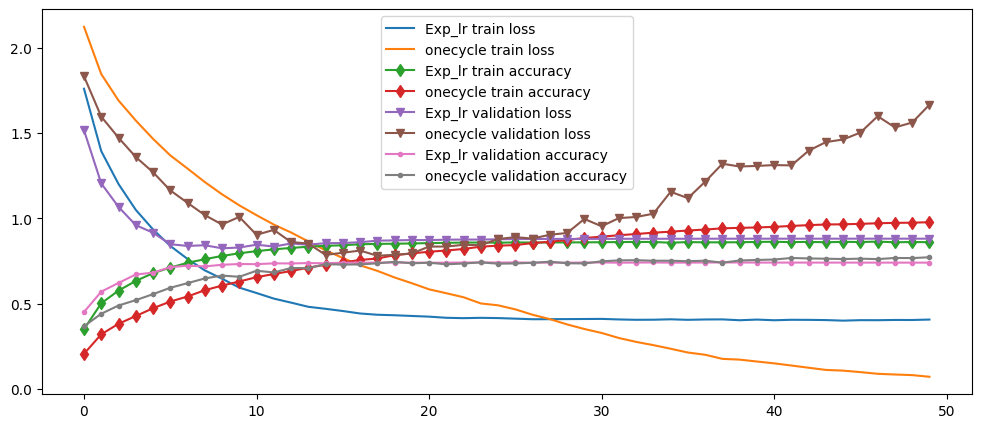

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_Exp_lr.history["loss"], label="Exp_lr train loss")
ax.plot(history_onecycle.history["loss"], label="onecycle train loss")
ax.plot(history_Exp_lr.history["accuracy"], label="Exp_lr train accuracy", marker='d')
ax.plot(history_onecycle.history["accuracy"], label="onecycle train accuracy", marker='d')
ax.plot(history_Exp_lr.history["val_loss"], label="Exp_lr validation loss", marker='v')
ax.plot(history_onecycle.history["val_loss"], label="onecycle validation loss", marker='v')
ax.plot(history_Exp_lr.history["val_accuracy"], label="Exp_lr validation accuracy", marker='.')
ax.plot(history_onecycle.history["val_accuracy"], label="onecycle validation accuracy", marker='.')
ax.legend()

# evaluate the model (Exponential)

In [ ]:
# evaluate the model (Exponential)
print(model_Exp_lr.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 0.9658834934234619, 'accuracy': 0.73089998960495}


# evaluate the model (One Cycle)

In [ ]:
# evaluate the model (One Cycle)
print(model_One_cycle_lr.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 1.8029155731201172, 'accuracy': 0.7684999704360962}


#Define a CNN model without Pooling layer

In [ ]:
model_without_Pooling = keras.models.Sequential([
    keras.layers.Conv2D(50, 5, activation="relu",
                         padding="same", input_shape=[32, 32, 3]),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")                                
])

model_without_Pooling.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 50)        3800      
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 100)       45100     
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 200)       180200    
                                                                 
 flatten_7 (Flatten)         (None, 204800)            0         
                                                                 
 dense_21 (Dense)            (None, 100)               20480100  
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 50)               

In [ ]:
model_without_Pooling.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
start_time = time.time()
history_model_without_Pooling = model_without_Pooling.fit(x_train, y_train, epochs=50, validation_split=0.15)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1329/1329 [==============================] - 26s 17ms/step - loss: 1.9924 - accuracy: 0.2498 - val_loss: 1.6038 - val_accuracy: 0.4007
Epoch 2/50
1329/1329 [==============================] - 23s 17ms/step - loss: 1.6438 - accuracy: 0.3997 - val_loss: 1.4671 - val_accuracy: 0.4752
Epoch 3/50
1329/1329 [==============================] - 22s 17ms/step - loss: 1.4966 - accuracy: 0.4598 - val_loss: 1.3476 - val_accuracy: 0.5245
Epoch 4/50
1329/1329 [==============================] - 22s 17ms/step - loss: 1.3867 - accuracy: 0.5015 - val_loss: 1.2657 - val_accuracy: 0.5485
Epoch 5/50
1329/1329 [==============================] - 23s 17ms/step - loss: 1.2794 - accuracy: 0.5413 - val_loss: 1.1961 - val_accuracy: 0.5764
Epoch 6/50
1329/1329 [==============================] - 22s 17ms/step - loss: 1.1859 - accuracy: 0.5743 - val_loss: 1.1392 - val_accuracy: 0.6037
Epoch 7/50
1329/1329 [==============================] - 22s 17ms/step - loss: 1.0897 - accuracy: 0.6092 - val_loss: 1.1461 -

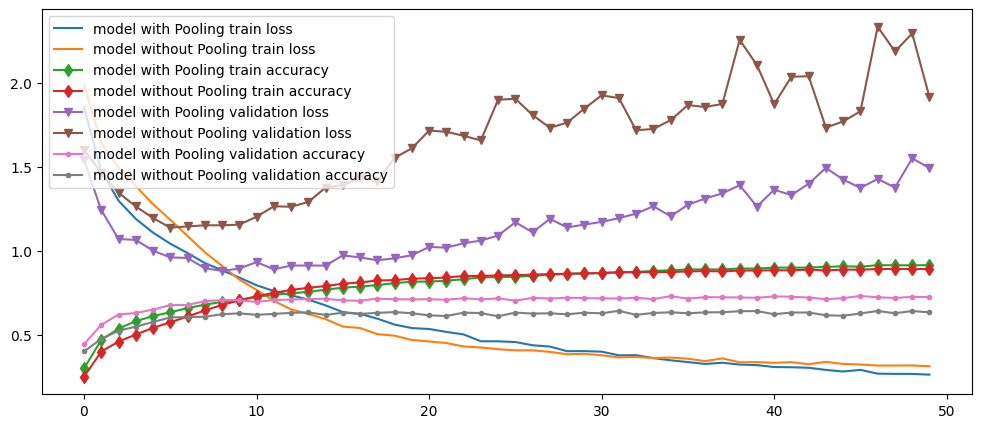

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="model with Pooling train loss")
ax.plot(history_model_without_Pooling.history["loss"], label="model without Pooling train loss")
ax.plot(history.history["accuracy"], label="model with Pooling train accuracy", marker='d')
ax.plot(history_model_without_Pooling.history["accuracy"], label="model without Pooling train accuracy", marker='d')
ax.plot(history.history["val_loss"], label="model with Pooling validation loss", marker='v')
ax.plot(history_model_without_Pooling.history["val_loss"], label="model without Pooling validation loss", marker='v')
ax.plot(history.history["val_accuracy"], label="model with Pooling validation accuracy", marker='.')
ax.plot(history_model_without_Pooling.history["val_accuracy"], label="model without Pooling validation accuracy", marker='.')
ax.legend()

In [ ]:
# evaluate the model with Pooling
print(model.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 1.6355186700820923, 'accuracy': 0.7200000286102295}


In [ ]:
# evaluate the model without Pooling
print(model_without_Pooling.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 1.9615123271942139, 'accuracy': 0.6330000162124634}


# Define a CNN model with Pooling layer and stride = 2

In [ ]:
model_pool_stride_2 = keras.models.Sequential([
    keras.layers.Conv2D(50, 5, activation="relu",
                         padding="same", input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(2, strides = 2),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, strides = 2),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")                                
])

model_pool_stride_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 50)        3800      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 100)       45100     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 100)        0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 200)         180200    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 4, 4, 200)       

In [ ]:
model_pool_stride_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
start_time = time.time()
history_model_pool_stride_2 = model_pool_stride_2.fit(x_train, y_train, epochs=50, validation_split=0.15)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1329/1329 [==============================] - 11s 7ms/step - loss: 1.8977 - accuracy: 0.2871 - val_loss: 1.5408 - val_accuracy: 0.4401
Epoch 2/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.5503 - accuracy: 0.4311 - val_loss: 1.3091 - val_accuracy: 0.5379
Epoch 3/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.3991 - accuracy: 0.4974 - val_loss: 1.2062 - val_accuracy: 0.5769
Epoch 4/50
1329/1329 [==============================] - 10s 7ms/step - loss: 1.2844 - accuracy: 0.5413 - val_loss: 1.1361 - val_accuracy: 0.6000
Epoch 5/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.2036 - accuracy: 0.5760 - val_loss: 1.1349 - val_accuracy: 0.5993
Epoch 6/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.1295 - accuracy: 0.6041 - val_loss: 1.0062 - val_accuracy: 0.6548
Epoch 7/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.0717 - accuracy: 0.6256 - val_loss: 0.9590 - val_accurac

# Define a CNN model with Pooling layer and stride = 4

In [ ]:
model_pool_stride_4 = keras.models.Sequential([
    keras.layers.Conv2D(50, 5, activation="relu",
                         padding="same", input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(2, strides = 4),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, strides = 4),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, strides = 4),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")                                
])

model_pool_stride_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 50)        3800      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 100)         45100     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 2, 2, 100)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 2, 2, 200)         180200    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 1, 1, 200)       

In [ ]:
model_pool_stride_4.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
start_time = time.time()
history_model_pool_stride_4 = model_pool_stride_4.fit(x_train, y_train, epochs=50, validation_split=0.15)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1329/1329 [==============================] - 10s 6ms/step - loss: 1.8870 - accuracy: 0.2918 - val_loss: 1.5888 - val_accuracy: 0.4179
Epoch 2/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.5634 - accuracy: 0.4366 - val_loss: 1.4348 - val_accuracy: 0.4775
Epoch 3/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.4313 - accuracy: 0.4908 - val_loss: 1.3066 - val_accuracy: 0.5360
Epoch 4/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.3346 - accuracy: 0.5309 - val_loss: 1.2979 - val_accuracy: 0.5432
Epoch 5/50
1329/1329 [==============================] - 8s 6ms/step - loss: 1.2575 - accuracy: 0.5644 - val_loss: 1.2532 - val_accuracy: 0.5591
Epoch 6/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.1905 - accuracy: 0.5900 - val_loss: 1.2375 - val_accuracy: 0.5680
Epoch 7/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.1349 - accuracy: 0.6100 - val_loss: 1.1870 - val_accuracy

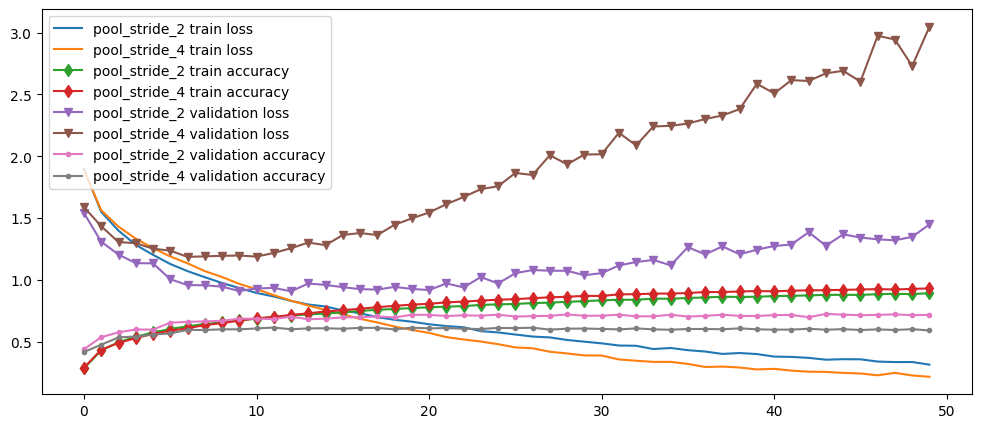

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_model_pool_stride_2.history["loss"], label="pool_stride_2 train loss")
ax.plot(history_model_pool_stride_4.history["loss"], label="pool_stride_4 train loss")
ax.plot(history_model_pool_stride_2.history["accuracy"], label="pool_stride_2 train accuracy", marker='d')
ax.plot(history_model_pool_stride_4.history["accuracy"], label="pool_stride_4 train accuracy", marker='d')
ax.plot(history_model_pool_stride_2.history["val_loss"], label="pool_stride_2 validation loss", marker='v')
ax.plot(history_model_pool_stride_4.history["val_loss"], label="pool_stride_4 validation loss", marker='v')
ax.plot(history_model_pool_stride_2.history["val_accuracy"], label="pool_stride_2 validation accuracy", marker='.')
ax.plot(history_model_pool_stride_4.history["val_accuracy"], label="pool_stride_4 validation accuracy", marker='.')
ax.legend()

In [ ]:
# evaluate the model (Exponential)
print(model_pool_stride_2.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 1.4666532278060913, 'accuracy': 0.7124999761581421}


In [ ]:
# evaluate the model (Exponential)
print(model_pool_stride_4.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 3.017502546310425, 'accuracy': 0.5864999890327454}


In [ ]:
x_train.shape

(50000, 32, 32, 3)

#Using VGG16 for Cifar10

#Using VGG16 without trainable layer

In [ ]:
VGG16_base = keras.applications.VGG16(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(VGG16_base.output)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
Freeze_model = keras.Model(inputs=VGG16_base.input, outputs=output)

In [ ]:
for layer in VGG16_base.layers:
  layer.trainable = False

In [ ]:
Freeze_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
x_train = x_train[:1000, ]/255.0
y_train = y_train[:1000,]

In [ ]:
Freeze_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
Freeze_model_history = Freeze_model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
27/27 [==============================] - 2s 57ms/step - loss: 2.3601 - accuracy: 0.0976 - val_loss: 2.3253 - val_accuracy: 0.1000
Epoch 2/50
27/27 [==============================] - 0s 10ms/step - loss: 2.3073 - accuracy: 0.1012 - val_loss: 2.3097 - val_accuracy: 0.1000
Epoch 3/50
27/27 [==============================] - 0s 11ms/step - loss: 2.3072 - accuracy: 0.0812 - val_loss: 2.3122 - val_accuracy: 0.1000
Epoch 4/50
27/27 [==============================] - 0s 11ms/step - loss: 2.3102 - accuracy: 0.1141 - val_loss: 2.3107 - val_accuracy: 0.0867
Epoch 5/50
27/27 [==============================] - 0s 10ms/step - loss: 2.3058 - accuracy: 0.0929 - val_loss: 2.3138 - val_accuracy: 0.1133
Epoch 6/50
27/27 [==============================] - 0s 10ms/step - loss: 2.3069 - accuracy: 0.0929 - val_loss: 2.3164 - val_accuracy: 0.1000
Epoch 7/50
27/27 [==============================] - 0s 10ms/step - loss: 2.3057 - accuracy: 0.1071 - val_loss: 2.3127 - val_accuracy: 0.1000
Epoch 8/50
27

#Using VGG16 with one trainable layer

In [ ]:
VGG16_base = keras.applications.VGG16(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(VGG16_base.output)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
Freeze_model2 = keras.Model(inputs=VGG16_base.input, outputs=output)

In [ ]:
for layer in VGG16_base.layers:
  layer.trainable = True
for layer in VGG16_base.layers[:-2]:
  layer.trainable = False

In [ ]:
Freeze_model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
Freeze_model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
Freeze_model2_history= Freeze_model2.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1329/1329 [==============================] - 19s 12ms/step - loss: 1.2371 - accuracy: 0.5712 - val_loss: 1.1160 - val_accuracy: 0.6045
Epoch 2/50
1329/1329 [==============================] - 15s 12ms/step - loss: 1.0413 - accuracy: 0.6365 - val_loss: 1.0789 - val_accuracy: 0.6192
Epoch 3/50
1329/1329 [==============================] - 15s 11ms/step - loss: 0.9655 - accuracy: 0.6599 - val_loss: 1.0785 - val_accuracy: 0.6256
Epoch 4/50
1329/1329 [==============================] - 16s 12ms/step - loss: 0.9251 - accuracy: 0.6725 - val_loss: 0.9959 - val_accuracy: 0.6493
Epoch 5/50
1329/1329 [==============================] - 16s 12ms/step - loss: 0.8854 - accuracy: 0.6868 - val_loss: 1.0154 - val_accuracy: 0.6459
Epoch 6/50
1329/1329 [==============================] - 15s 11ms/step - loss: 0.8506 - accuracy: 0.6995 - val_loss: 0.9978 - val_accuracy: 0.6492
Epoch 7/50
1329/1329 [==============================] - 15s 11ms/step - loss: 0.8177 - accuracy: 0.7089 - val_loss: 0.9866 -

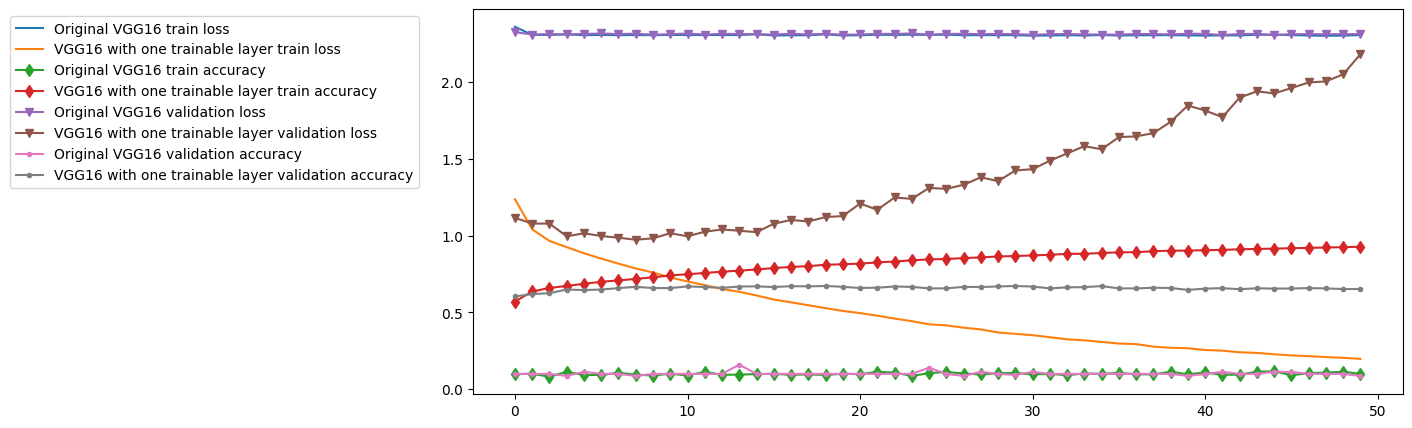

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(Freeze_model_history.history["loss"], label="Original VGG16 train loss")
ax.plot(Freeze_model2_history.history["loss"], label="VGG16 with one trainable layer train loss")
ax.plot(Freeze_model_history.history["accuracy"], label="Original VGG16 train accuracy", marker='d')
ax.plot(Freeze_model2_history.history["accuracy"], label="VGG16 with one trainable layer train accuracy", marker='d')
ax.plot(Freeze_model_history.history["val_loss"], label="Original VGG16 validation loss", marker='v')
ax.plot(Freeze_model2_history.history["val_loss"], label="VGG16 with one trainable layer validation loss", marker='v')
ax.plot(Freeze_model_history.history["val_accuracy"], label="Original VGG16 validation accuracy", marker='.')
ax.plot(Freeze_model2_history.history["val_accuracy"], label="VGG16 with one trainable layer validation accuracy", marker='.')
ax.legend(bbox_to_anchor=(-0.05,1))

In [ ]:
# evaluate the model (Original VGG16)
print(Freeze_model.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 2.4229190349578857, 'accuracy': 0.12759999930858612}


In [ ]:
# evaluate the model (VGG16 with one trainable layer)
print(Freeze_model2.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 2.2608838081359863, 'accuracy': 0.6499999761581421}
